In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from astropy.time import Time
from pathlib import Path
import scipy

import setigen as stg

IMG_DIR = Path("../../docs/source/images/")

In [2]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

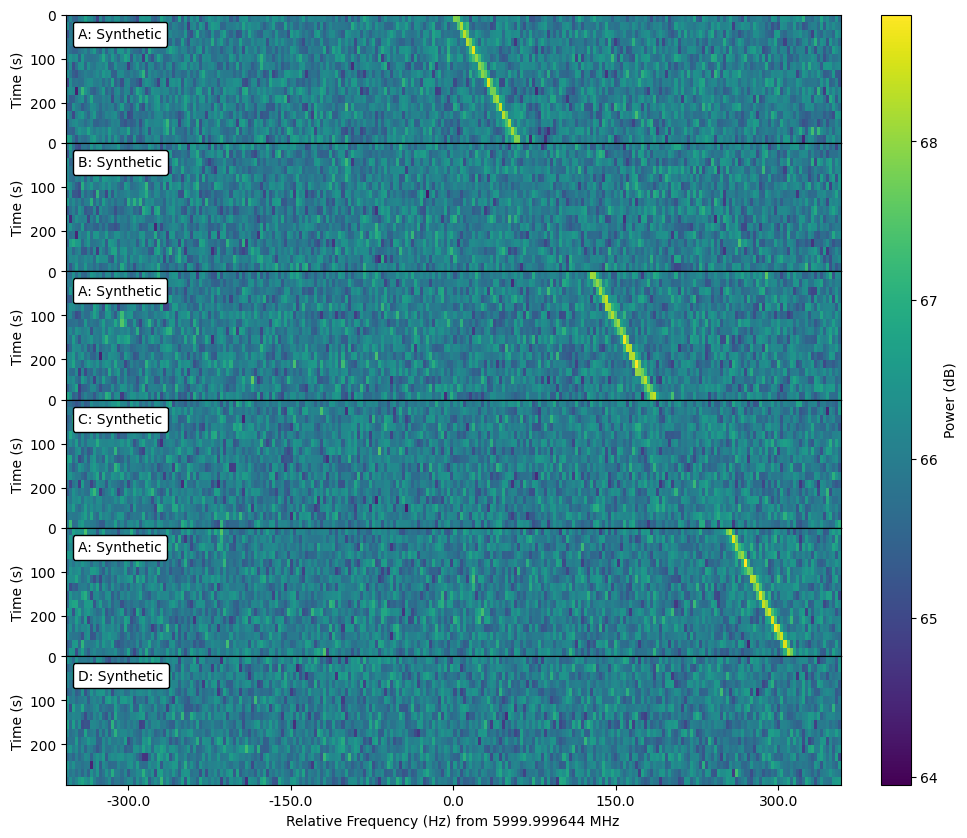

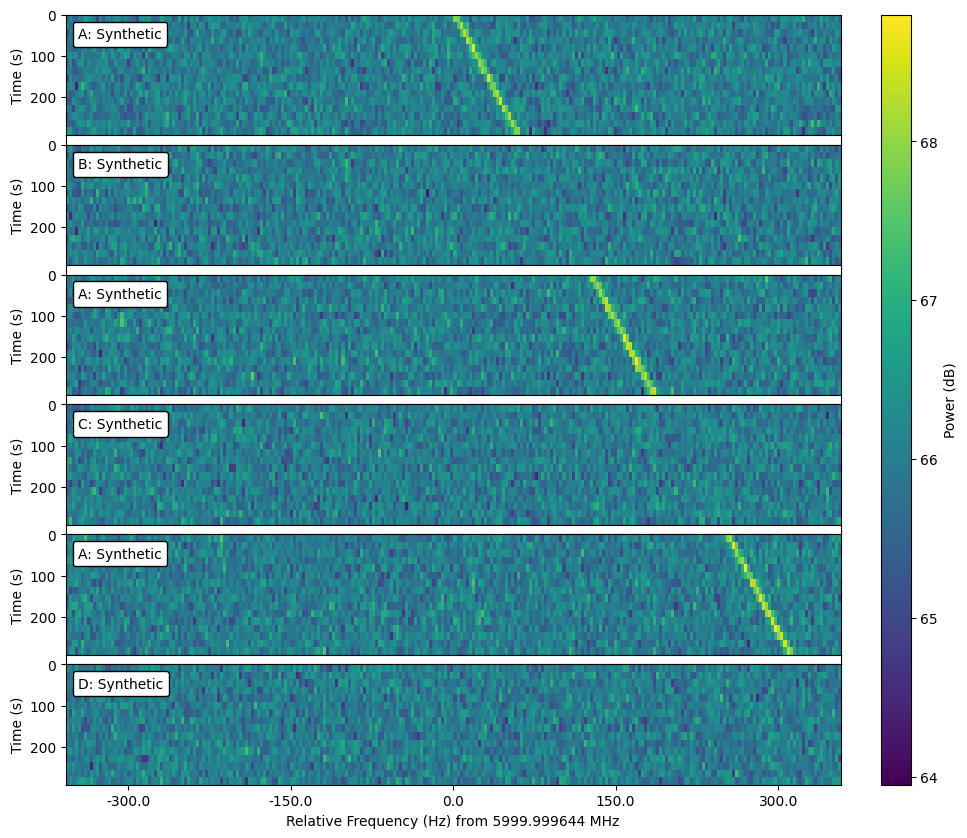

In [14]:
mjd_start = 56789
obs_length = 300
slew_time = 15

t_start_arr = [Time(mjd_start, format='mjd').unix]
for i in range(1, 6):
    t_start_arr.append(t_start_arr[i - 1] + obs_length + slew_time)

c = stg.OrderedCadence([stg.Frame(tchans=16, fchans=256, t_start=t_start_arr[i]) 
                            for i in range(6)], 
                           order="ABACAD")
c.apply(lambda fr: fr.add_noise(4e6))
c.by_label("A").add_signal(stg.constant_path(f_start=c[0].get_frequency(index=128),
                                drift_rate=0.2*u.Hz/u.s),
                            stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                            stg.sinc2_f_profile(width=2*c[0].df*u.Hz),
                            stg.constant_bp_profile(level=1),
                            doppler_smearing=True)

fig = plt.figure(figsize=(10, 10))
c.plot()
fig.savefig(IMG_DIR / "c_plot.png", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
c.plot(slew_times=True)
fig.savefig(IMG_DIR / "c_plot_slew.png", bbox_inches='tight')
plt.show()